### Exploratory Data Analysis

In this file, we will dig into the wildfire incident data further using:

- bar charts to observe trends over time
- scatterplots to look for relationships in the data
- investigations of outliers

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
fires_df_clean = pd.read_csv('./claire_data/fires_compiled.csv')

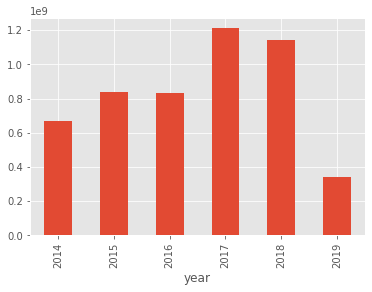

In [3]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar');

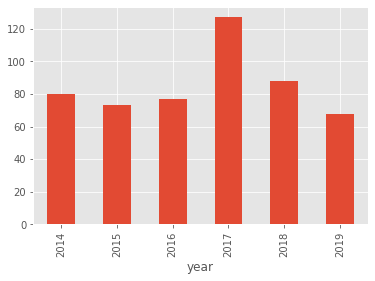

In [4]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar');

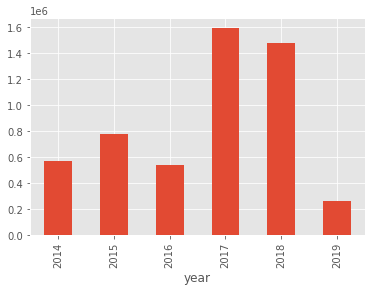

In [5]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar');

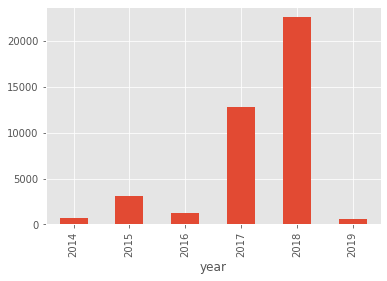

In [6]:
fires_df_clean.groupby('year')['Structures Destroyed'].sum().plot(kind='bar');

<AxesSubplot:>

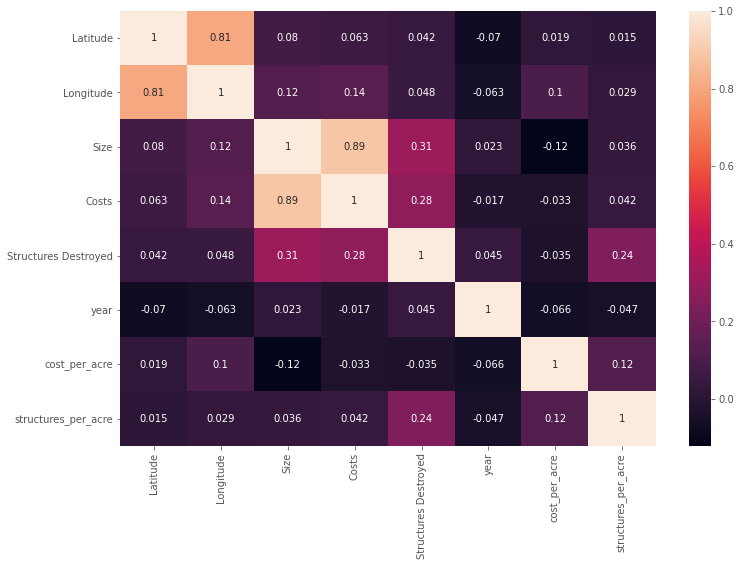

In [7]:
plt.subplots(figsize=(12,8))
sns.heatmap(fires_df_clean.corr(), annot=True)

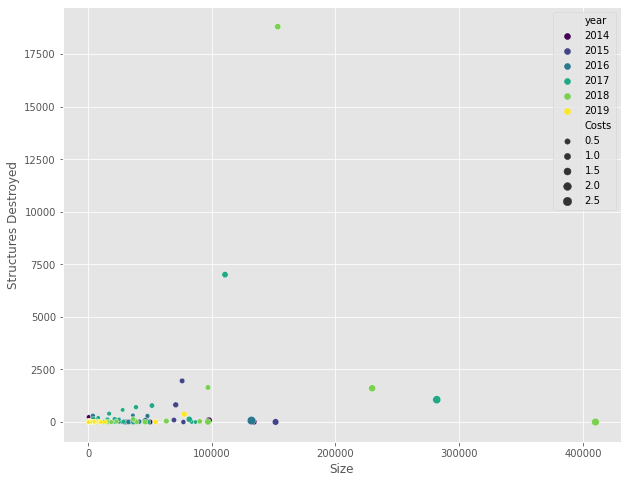

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df_clean, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

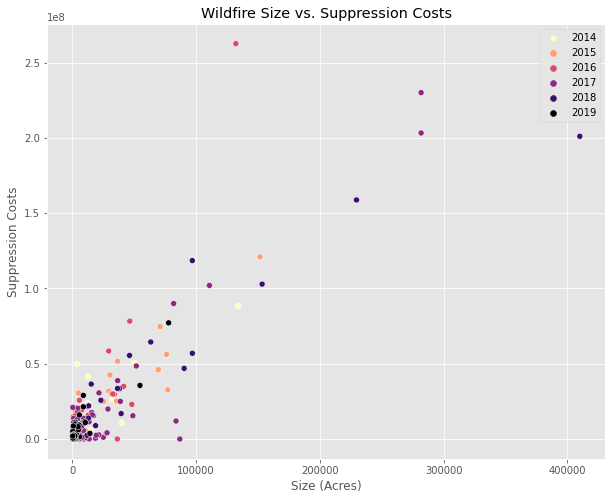

In [9]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='magma_r')
plt.legend(loc='best')
plt.title('Wildfire Size vs. Suppression Costs')
plt.xlabel('Size (Acres)')
plt.ylabel('Suppression Costs');

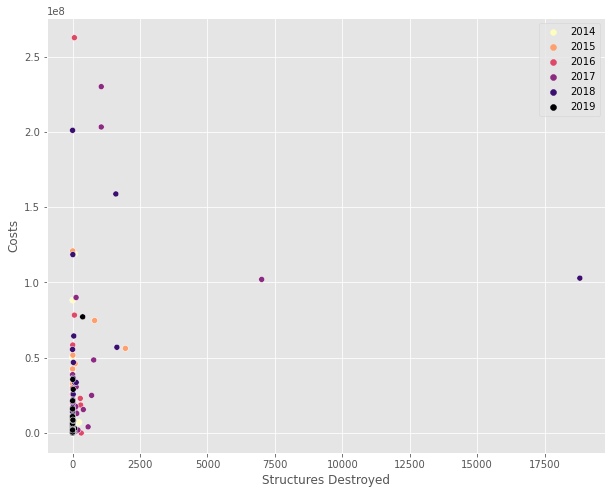

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='magma_r')
plt.legend(loc='best');

In [9]:
fires_df_clean.sort_values(by='Structures Destroyed', ascending=False).head()

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,Fire Name,start_date,year,county
386,CA-BTU-016737,CAMP,WF,40,121,153336.0,Acres,102843527.0,18804,CAMP,2018-11-08,2018,Plumas
249,CA-LNU-010104,CENTRAL LNU COMPLEX,WF,38,123,110720.0,Acres,102000000.0,7010,CENTRAL LNU COMPLEX,2017-10-09,2017,Marin
92,CA-LNU-008670,VALLEY,WF,39,123,76067.0,Acres,56220000.0,1958,VALLEY,2015-09-12,2015,Lake
434,CA-VNC-091023,WOOLSEY,WF,34,119,96949.0,Acres,56943320.0,1643,WOOLSEY,2018-11-08,2018,Ventura
382,CA-WNP-001084,CARR,WF,41,123,229651.0,Acres,158744844.0,1604,CARR,2018-07-23,2018,Siskiyou


In [10]:
fires_df_clean['cost_per_acre'] = fires_df_clean['Costs'] / fires_df_clean['Size']

In [11]:
fires_df_clean['cost_per_acre'].describe()

count      513.000000
mean      3072.858160
std       5408.584475
min          0.000012
25%        519.458333
50%       1395.839659
75%       3711.177419
max      65830.721003
Name: cost_per_acre, dtype: float64

In [12]:
fires_df_clean.sort_values(by = ['cost_per_acre'], ascending=False)

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,Fire Name,start_date,year,county,cost_per_acre
272,CA-SRF-000703,Marble,WF,41,124,319.0,Acres,21000000.0,0,MARBLE,2017-07-19,2017,Humboldt,65830.721003
84,CA-HUU-006254,HORSE,WF,40,124,146.0,Acres,8700000.0,0,HORSE,2015-08-18,2015,Humboldt,59589.041096
136,CA-ANF-003651,WARM,WF,35,119,300.0,Acres,9000000.0,3,WARM,2015-08-16,2015,Kern,30000.000000
154,CA-HUU-006956,TULLEY,WF,41,124,599.0,Acres,14750000.0,3,TULLEY,2016-08-22,2016,Humboldt,24624.373957
94,CA-HUU-005420,QUEEN,WF,41,124,158.0,Acres,3256960.0,0,QUEEN,2015-07-25,2015,Humboldt,20613.670886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,CA-MCP-001207,CARL,WF,33,118,4000.0,Acres,1000.0,0,CARL,2015-04-28,2015,San Diego,0.250000
245,CA-MDF-000656,RIMROCK,WF,42,121,700.0,Acres,1.0,0,RIMROCK,2017-07-24,2017,Klamath,0.001429
483,CA-VNC-089158,EASY,WF,34,119,1806.0,Acres,2.5,1,EASY,2019-10-30,2019,Ventura,0.001384
257,CA-KNF-005915,CEDAR,WF,42,123,9122.0,Acres,1.0,0,CEDAR,2017-08-08,2017,Siskiyou,0.000110


In [13]:
fires_df_clean.groupby('year')['cost_per_acre'].mean()

year
2014    3211.952170
2015    4440.627015
2016    2915.198240
2017    2670.354458
2018    2832.880773
2019    2681.698553
Name: cost_per_acre, dtype: float64

In [14]:
# Calculating a mean value to be used for predictions
fires_df_clean['cost_per_acre'].mean()

3072.858159768552

In [15]:
fires_df_clean.groupby('year')['Structures Destroyed'].mean()

year
2014      8.437500
2015     42.164384
2016     15.532468
2017    100.551181
2018    256.397727
2019      8.279412
Name: Structures Destroyed, dtype: float64

In [43]:
fires_df_clean['structures_per_acre'] = fires_df_clean['Structures Destroyed'] / fires_df_clean['Size']

In [44]:
fires_df_clean['structures_per_acre'].describe()

count    513.000000
mean       0.004719
std        0.026054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000515
max        0.463178
Name: structures_per_acre, dtype: float64

In [10]:
# Calculating a mean value to be used for predictions
fires_df_clean['structures_per_acre'].mean()

0.0047194010592387595

In [13]:
insurance_df = pd.read_csv('./jerry_data/ca_fire_insurance.csv',)

In [14]:
insurance_df.head()

,company,written_premium_(b),market_share,earned_premium_(b),incurred_loss_(b),loss_ratio,year
0,Company,Written Premium (b),Market Share,Earned Premium (b),Incurred Loss (b),Loss Ratio,Year
1,Acceptance Ind Ins Co - 20010,150,0.0000%,157,(196),-124.84%,2019
2,Ace Amer Ins Co - 22667,"257,039",0.0238%,"211,368","(7,113)",-3.37%,2019
3,Admiral Ind Co - 44318,6,0.0000%,2,-,0.00%,2019
4,Aegis Security Ins Co - 33898,"585,397",0.0541%,"623,686","111,352",17.85%,2019


In [18]:
insurance_df = insurance_df.drop(index=0)

In [24]:
insurance_df = insurance_df[insurance_df['incurred_loss_(b)'] != ' -   ']

In [25]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 1 to 1378
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   company              1330 non-null   object
 1   written_premium_(b)  1330 non-null   object
 2   market_share         1330 non-null   object
 3   earned_premium_(b)   1330 non-null   object
 4   incurred_loss_(b)    1330 non-null   object
 5   loss_ratio           1330 non-null   object
 6   year                 1330 non-null   object
dtypes: object(7)
memory usage: 83.1+ KB


In [27]:
# Source: https://pythonpedia.com/en/knowledge-base/31521526/convert-currency-to-float--and-parentheses-indicate-negative-amounts-
insurance_df['incurred_loss_(b)'] = (insurance_df['incurred_loss_(b)'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [30]:
ins_loss = pd.DataFrame(insurance_df.groupby('year')['incurred_loss_(b)'].sum())

In [31]:
format_dict = {'pred_acres': '{0:,.0f}', 'pred_cost':'${0:,.0f}', 'pred_structures_destroyed': '{0:,.2f}'}
ins_loss

,incurred_loss_(b)
year,
2014,3.932870e+08
2015,4.522006e+08
2016,3.861139e+08
2017,9.020867e+08
2018,1.534084e+09
2019,3.240815e+08


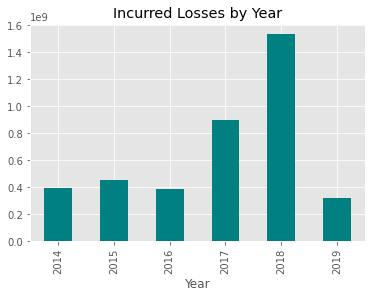

In [39]:
ins_loss['incurred_loss_(b)'].plot(kind='bar', color='teal')
plt.title('Incurred Losses by Year')
plt.xlabel('Year');